In [5]:
import numpy as np
from numpy import inf
import matplotlib.pyplot as plt
%matplotlib inline
import PIL.Image
import networkx as nx
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
import string

from functions.genome_topology import open_pdb
from functions.genome_topology import select_chrom
from functions.genome_topology import geom_distance
from functions.genome_topology import get_matrix
from functions.genome_topology import normalize_psc
from functions.genome_topology import Select_entangled_fraction

from functions.plotting_tools import set_layout

In [23]:
#Projects topology matrix trace on top of chromosome contact map
def Trace_to_cmap(trace, size):
    cmap_mat = np.zeros([size,size])
    ind = 0
    for row in index:
        x = row[0]
        y = row[1]
    
        if (trace[ind]!= 0):
            cmap_mat[x][y] = (trace[ind])
            cmap_mat[y][x] = (trace[ind])
        ind = ind + 1
        
    return cmap_mat

#Create plot above heatmap
def plot_over_map(data,avg, ax, ax_histx):
    data=data.transpose()
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histx.tick_params(axis="y", labelleft=False)
    cmap = sns.cm.rocket_r
    sns.heatmap(data, cmap=cmap, ax=ax)
    ax_histx.plot(avg, label = 'Entangled fraction per 100 kb')
    

    ax_histx.legend(bbox_to_anchor=(1.0, 0.0))
    
    ax.set_ylabel('Mb', fontsize = 30)
    
    ax.set_xlabel('Mb', fontsize = 30)
    return 0

#Creates plot made by two rectangles
def plot_rectangle(avg, data, params, new_labels):
    #left, width, bottom, height, spacing,
    rect_scatter = [params[0], params[2], params[1], params[3]]
    rect_histx = [params[0], params[2] + params[3] + params[4], params[1]-0.22, 0.07]
   
    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_axes(rect_scatter)

    old_ticks = ax.get_xticks()
    new_ticks = np.linspace(np.min(old_ticks), np.max(old_ticks), len(new_labels))
    ax.set_xticks(new_ticks)
    ax.set_xticklabels(new_labels, fontsize = 20)
    ax.set_yticks(new_ticks)
    ax.set_yticklabels(new_labels, fontsize = 20)
    ax_histx = fig.add_axes(rect_histx, sharex=ax)
    plot_over_map(data,avg, ax, ax_histx)
    #ax_histx.legend(bbox_to_anchor=(1.0, 1.0))

    #plt.title('{}, after 2 us'.format(label))
    return fig

# PROJECT TOPOLOGICAL INFORMATION ON CHROMOSOME CONTACT MAP

In this notebook, we calculate the entangled fraction per contact. This information is then plotted on top of the contact map: each contact is color coded based on how many entangled relations it entartains in the topology matrix (heatmap). The contact matrix is simmetric, and each contact is represented as two matrix elements, each on both side of the diagonal. Therefore the same color coding is applied on both sides of the diagonal. Then, we also plot the entangled fraction as a 1D plot, where each point represents the number of entangled relations experienced by each contact site (in units of 100kb particles). 

Choose chromosome and paramters: cutoff radius and number of neighbors to exclude from the analysis

In [53]:
#Choose path
path = 'data/pdbs/cell1'

#Choose parameters
r_cutoff=1.5
neighbours=1
chosen_chr=18

n_all_chr=20
letters=list(string.ascii_lowercase)
chr_vec=['chr {}'.format(letter) for letter in letters[:n_all_chr]]
particle_toMb_factor=0.1
cell=path[-5: len(path)]
print('Analyzing cell {} and {}'.format(cell[-1:], chr_vec[chosen_chr]))

Analyzing cell 1 and chr s


Calculate topology and make 2D and 1D projection

In [20]:
#Calculate topology from 3D structure, and select entangle fraction
n, coord= select_chrom(chosen_chr, path)
dist, n_contact, index=geom_distance(coord, r_cutoff, neighbours)
mat, psc = get_matrix(index, chr_vec[chosen_chr])
mat_entangled = Select_entangled_fraction(mat)

#Make 2D and 1D projection of entangled fraction
trace_for_heatmap = np.log(np.sum(mat_entangled, axis=1))
trace_for_1Dplot = np.sum(mat_entangled, axis=1)
cmap_for_heatmap = Trace_to_cmap(trace_for_heatmap, len(coord))
cmap_for_1Dplot = Trace_to_cmap(trace_for_1Dplot, len(coord))
heat_map=pd.DataFrame(cmap_for_heatmap)
trace_1Dplot = np.sum(cmap_for_1Dplot, axis=1)

Plot heatmap + 1D plot of entangled fraction

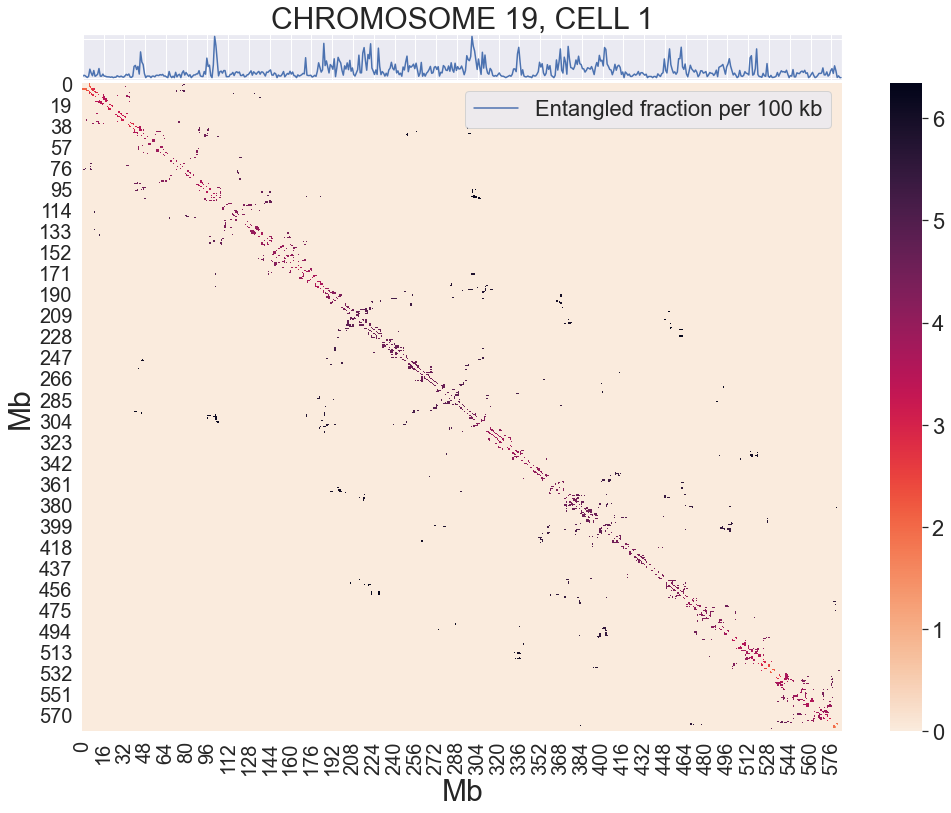

In [30]:
set_layout()
len_MB = particle_toMb_factor * len(coord)
new_labels=np.linspace(0, len_MB , 15)
left, width = 0.5, 1.1
bottom, height = 0.1, 1.0
spacing = 0.005
params= [left, width,bottom, height,spacing]

sns.set(font_scale=2) 
plot_rectangle(trace_1Dplot, heat_map, params, new_labels)
plt.title('CHROMOSOME {}, CELL {}'.format(chosen_chr + 1, cell[-1:len(cell)] ), fontsize = 30);

#Save figures
#plt.savefig('results/figures/chromosome heatmaps/{}, {}.svg'.format(chr_vec[n_chr], cell),bbox_inches='tight')
#plt.savefig('results/figures/chromosome heatmaps/{}, {}.png'.format(chr_vec[n_chr], cell),bbox_inches='tight')

Compare same section of chromosome maps, for different cells. Choose the start and end point of the selection.

C:\Users\scalvinib\Anaconda3\envs\data_analysis\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


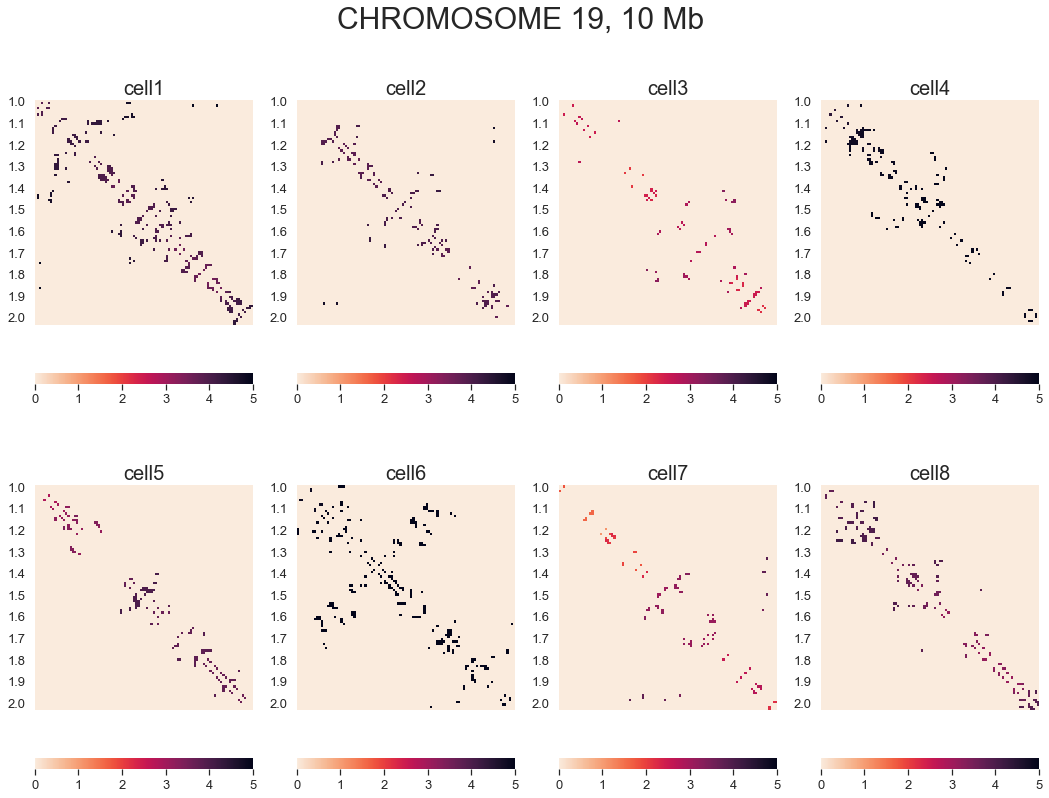

In [64]:
set_layout()
fig, axs = plt.subplots(2, 4, figsize=(18, 13))
cells=['cell{}'.format(number) for number in range(1,9)]
chosen_chr = 18
start_square=100
end_square=200
cmap = sns.cm.rocket_r
size_square=  int(end_square - start_square)
start_square_Mb=(particle_toMb_factor*start_square)
end_square_Mb=(particle_toMb_factor*end_square)
size_Mb=int(particle_toMb_factor*size_square)

for t in range(len(cells)):
    #Make heatmap
    path = 'data/pdbs/{}'.format(cells[t])
    n, coord= select_chrom(chosen_chr, path)
    dist, n_contact, index=geom_distance(coord, r_cutoff, neighbours)
    mat, psc = get_matrix(index, chr_vec[chosen_chr])
    mat_entangled= Select_entangled_fraction(mat)
    trace = np.log(np.sum(mat_entangled, axis=1))
    new_cmap = Trace_to_cmap(trace, len(coord))
    new_cmap[new_cmap == -inf]=0.0
    
    #Make selection
    new_cmap=pd.DataFrame(new_cmap[start_square:end_square, start_square:end_square])
    
    #Plot heatmap in subplots
    x, y = np.unravel_index(t, (2,4))
    sns.heatmap(new_cmap, cmap=cmap, ax=axs[x,y], cbar_kws = dict(location="bottom"), vmin=0, vmax=5)
    axs[x,y].tick_params(axis="x", labelbottom=False)
    axs[x,y].set_title(cells[t], fontsize=20)
    
    new_labels=[str(round(num,1)) for num in np.arange(start_square_Mb/10,end_square_Mb/10+particle_toMb_factor,
                                                       particle_toMb_factor)]
    old_ticks = axs[x,y].get_yticks()
    new_ticks = np.linspace(np.min(old_ticks), np.max(old_ticks), len(new_labels))
    axs[x,y].set_yticks(new_ticks)
    axs[x,y].set_yticklabels(new_labels)
    

plt.suptitle('CHROMOSOME {}, {} Mb'.format(chosen_chr + 1, size_Mb),  fontsize = 30);    

#Save figures
#plt.savefig('results/figures/chromosome heatmaps/detail_{}_comparison_allcells.png'.format(chr_vec[n_chr]),
#            bbox_inches='tight')
#plt.savefig('results/figures/chromosome heatmaps/detail_{}_comparison_allcells.eps'.format(chr_vec[n_chr]),
#            bbox_inches='tight')